In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\willn\\SynergisticIT\\Data Science\\Assignment_Data cleansing & EDA'

In [3]:
# import df
hallet_df = pd.read_csv('hallet.csv')
hallet_df

,Sr No,AGE,Time,Input (X),Output (y),HR,Height,Weight
0,1,Under-1,3:00:00 AM,36.8,36.8,176,43,2.5
1,1,Under-1,4:00:00 AM,38.6,36.0,162,43,2.5
2,1,Under-1,5:00:00 AM,36.8,36.8,167,43,2.5
3,1,Under-1,6:00:00 AM,36.8,33.4,160,43,2.5
4,1,Under-1,7:00:00 AM,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...,...,...
2790,77,Under-4,7:00:00 PM,35.6,35.8,141,47,2.8
2791,77,Under-4,7:30:00 PM,35.7,35.9,145,47,2.8
2792,77,Under-4,8:00:00 PM,35.8,36.0,148,47,2.8
2793,77,Under-4,8:30:00 PM,35.7,36.1,147,47,2.8


In [4]:
# move 'AGE' column next to other analyzable variable
hallet_df = hallet_df.iloc[:, [2,0,1,3,4,5,6,7]]
hallet_df

,Time,Sr No,AGE,Input (X),Output (y),HR,Height,Weight
0,3:00:00 AM,1,Under-1,36.8,36.8,176,43,2.5
1,4:00:00 AM,1,Under-1,38.6,36.0,162,43,2.5
2,5:00:00 AM,1,Under-1,36.8,36.8,167,43,2.5
3,6:00:00 AM,1,Under-1,36.8,33.4,160,43,2.5
4,7:00:00 AM,1,Under-1,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...,...,...
2790,7:00:00 PM,77,Under-4,35.6,35.8,141,47,2.8
2791,7:30:00 PM,77,Under-4,35.7,35.9,145,47,2.8
2792,8:00:00 PM,77,Under-4,35.8,36.0,148,47,2.8
2793,8:30:00 PM,77,Under-4,35.7,36.1,147,47,2.8


In [5]:
# check datatypes and compare non-null values 
hallet_df.info()
# all columns contain same number of non_null values ----> GOOD
# AGE column appears to be a string so dummy encoding looks necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        2795 non-null   object 
 1   Sr No       2795 non-null   int64  
 2   AGE         2795 non-null   object 
 3   Input (X)   2795 non-null   float64
 4   Output (y)  2795 non-null   float64
 5   HR          2795 non-null   int64  
 6   Height      2795 non-null   int64  
 7   Weight      2795 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 174.8+ KB


In [6]:
# high range of mean values, standardization/scaling likely
hallet_df.describe()

,Sr No,Input (X),Output (y),HR,Height,Weight
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,44.211449,36.846869,36.929138,147.235420,45.749911,2.422279
std,20.936879,8.607253,6.436327,68.189436,3.725081,0.518623
min,1.000000,30.100000,29.800000,60.000000,31.000000,1.000000
25%,26.000000,36.200000,36.500000,138.000000,44.000000,2.200000
50%,52.000000,36.700000,37.000000,144.000000,47.000000,2.500000
75%,61.000000,37.000000,37.200000,154.000000,48.000000,2.750000
max,77.000000,367.000000,373.000000,3155.000000,52.000000,3.800000


In [7]:
# Sr No is not descriptive enough, the number refers to the baby whose measurements are being recorded, Baby_ID is more descrip.
hallet_df.rename(columns = {'Sr No': 'Baby_ID'}, inplace=True)
hallet_df

,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight
0,3:00:00 AM,1,Under-1,36.8,36.8,176,43,2.5
1,4:00:00 AM,1,Under-1,38.6,36.0,162,43,2.5
2,5:00:00 AM,1,Under-1,36.8,36.8,167,43,2.5
3,6:00:00 AM,1,Under-1,36.8,33.4,160,43,2.5
4,7:00:00 AM,1,Under-1,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...,...,...
2790,7:00:00 PM,77,Under-4,35.6,35.8,141,47,2.8
2791,7:30:00 PM,77,Under-4,35.7,35.9,145,47,2.8
2792,8:00:00 PM,77,Under-4,35.8,36.0,148,47,2.8
2793,8:30:00 PM,77,Under-4,35.7,36.1,147,47,2.8


### Checking for Outliers

In [8]:
print("Highest allowed Input (X)",hallet_df['Input (X)'].mean() + 3*hallet_df['Input (X)'].std())
print("Lowest allowed Input (X)",hallet_df['Input (X)'].mean() - 3*hallet_df['Input (X)'].std())

print("Highest allowed Output (y)",hallet_df['Output (y)'].mean() + 3*hallet_df['Output (y)'].std())
print("Lowest allowed Output (y)",hallet_df['Output (y)'].mean() - 3*hallet_df['Output (y)'].std())

print("Highest allowed HR",hallet_df['HR'].mean() + 3*hallet_df['HR'].std())
print("Lowest allowed HR",hallet_df['HR'].mean() - 3*hallet_df['HR'].std())

print("Highest allowed Height",hallet_df['Height'].mean() + 3*hallet_df['Height'].std())
print("Lowest allowed Height",hallet_df['Height'].mean() - 3*hallet_df['Height'].std())

print("Highest allowed Weight",hallet_df['Weight'].mean() + 3*hallet_df['Weight'].std())
print("Lowest allowed Weight",hallet_df['Weight'].mean() - 3*hallet_df['Weight'].std())



Highest allowed Input (X) 62.66862823225375
Lowest allowed Input (X) 11.025110587066575
Highest allowed Output (y) 56.23811824140707
Lowest allowed Output (y) 17.620157250542654
Highest allowed HR 351.8037298018933
Lowest allowed HR -57.33288901477346
Highest allowed Height 56.92515429967145
Lowest allowed Height 34.57466680945198
Highest allowed Weight 3.978146947702433
Lowest allowed Weight 0.8664111918324431


In [9]:
hallet_df.describe()

,Baby_ID,Input (X),Output (y),HR,Height,Weight
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,44.211449,36.846869,36.929138,147.235420,45.749911,2.422279
std,20.936879,8.607253,6.436327,68.189436,3.725081,0.518623
min,1.000000,30.100000,29.800000,60.000000,31.000000,1.000000
25%,26.000000,36.200000,36.500000,138.000000,44.000000,2.200000
50%,52.000000,36.700000,37.000000,144.000000,47.000000,2.500000
75%,61.000000,37.000000,37.200000,154.000000,48.000000,2.750000
max,77.000000,367.000000,373.000000,3155.000000,52.000000,3.800000


<AxesSubplot:xlabel='index', ylabel='Input (X)'>

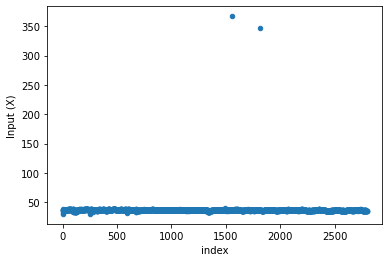

In [10]:
# look for outliers in Input(X)
hallet_df.reset_index().plot(kind='scatter', x= 'index', y ='Input (X)')
# it appears there are a few outliers that are drastically higher in value and their index values are near the middle 

In [11]:
# find outliers in Input (X) column using max and min allowable values calculated in function above
# more or less anything outside of the average of the column plus or minus 3 * Std of column
# i.e. anything above or below input_max or input_min need to go 
input_max = 62.66862823225375
input_min = 11.025110587066575

In [12]:
inputx_column_outliers = hallet_df[(hallet_df['Input (X)'] > input_max) | (hallet_df['Input (X)'] < input_min)]
inputx_column_outliers

,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight
1553,4:50:00 PM,52,Under-4,367.0,36.6,156,47,2.5
1809,2:00:00 PM,55,Under-2,347.1,36.1,114,31,1.5


In [13]:
input_column_drop_indices = []
for i, row in inputx_column_outliers.iterrows():
    input_column_drop_indices.append(i)
print('Index(es) to be dropped ---->', input_column_drop_indices)
print('These outliers have index values near the median index value as indicated in the graph above.')

Index(es) to be dropped ----> [1553, 1809]
These outliers have index values near the median index value as indicated in the graph above.


<AxesSubplot:xlabel='index', ylabel='Output (y)'>

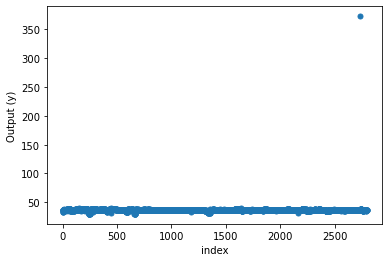

In [14]:
# look for outliers in Output(y)
hallet_df.reset_index().plot(kind='scatter', x= 'index', y ='Output (y)', s=25)
# it appears there is one outlier with a value dramatically higher than most and its index value is near the end of df

In [15]:
# find outliers in Output (y) column using max and min allowable values calculated in function above
# more or less anything outside of the average of the column plus or minus 3 * Std of column
# i.e. anything above or below input_max or input_min need to go 
outputy_max = 56.23811824140707
outputy_min = 17.620157250542654

In [16]:
outputy_column_outliers = hallet_df[(hallet_df['Output (y)'] > outputy_max) | (hallet_df['Output (y)'] < outputy_min)]
outputy_column_outliers

,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight
2734,9:00:00 PM,76,Under-1,37.1,373.0,145,46,1.72


In [17]:
outputy_column_drop_indices = []
for i, row in outputy_column_outliers.iterrows():
    outputy_column_drop_indices.append(i)
print('Index(es) to be dropped ---->', outputy_column_drop_indices)
print('This outlier has a very high index number as indicated in the graph above.')

Index(es) to be dropped ----> [2734]
This outlier has a very high index number as indicated in the graph above.


<AxesSubplot:xlabel='index', ylabel='HR'>

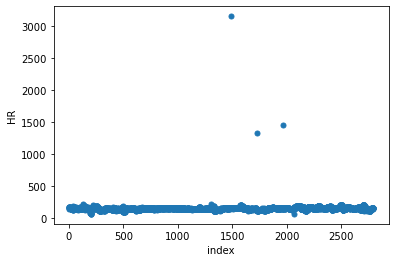

In [18]:
# look for outliers in Output(y)
hallet_df.reset_index().plot(kind='scatter', x= 'index', y ='HR', s=25)
# it appears there are at least 3 outliers with a values dramatically higher than most
# their indexes are in the upper middle of df

In [19]:
# find outliers in HR column using max and min allowable values calculated in function above
HR_max = 351.8037298018933
#No  HR_min needs to be created as HR stands for Heart Rate and if you have a heartrate below 0, you are, in fact, dead. 
HR_column_outliers = hallet_df[(hallet_df['HR'] > HR_max) | (hallet_df['Output (y)'] < 0)]
HR_column_outliers
## The outliers are clearly not valid and/or errors as their values are impossible 

,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight
1488,2:50:00 PM,52,Under-4,39.9,37.3,3155,47,2.5
1731,7:00:00 PM,54,Under-1,37.4,36.0,1321,39,1.9
1968,2:30:00 PM,59,Under-2,35.9,36.2,1447,49,2.3


In [20]:
HR_column_drop_indices = []
for i, row in HR_column_outliers.iterrows():
    HR_column_drop_indices.append(i)
print('Index(es) to be dropped ---->', HR_column_drop_indices)
print('The outliers have index values near the median and just above as indicated in the graph above.')

Index(es) to be dropped ----> [1488, 1731, 1968]
The outliers have index values near the median and just above as indicated in the graph above.


In [21]:
# find outliers in Height column using max and min allowable values calculated in function above
# more or less anything outside of the average of the column plus or minus 3 * Std of column
# i.e. anything above or below input_max or input_min need to go 
height_max= 56.92515429967145
height_min= 34.57466680945198

<AxesSubplot:xlabel='index', ylabel='Height'>

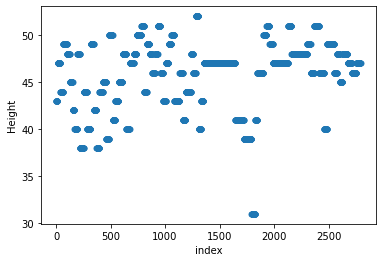

In [22]:
# look for outliers in Height
hallet_df.reset_index().plot(kind='scatter', x= 'index', y ='Height', s=25)
# it appears there are some outliers with values dramatically less than the others
# outlier index values in upper middle of df

In [23]:
# filter out outlier data points
height_column_outliers = hallet_df[(hallet_df['Height'] > height_max) | (hallet_df['Height'] < height_min)]
height_column_outliers

# The index values for the outliers reflect the group seen on the graph above ~1800
# Each 'dot' in the graph above likely represents a specific baby as we can see the ID number is identical for each outlier
# It is also interesting to note that index 1809 is also an outlier from the Input(X) column
### NEED TO SWITCH Sr No to Baby_ID like above ####


,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight
1793,10:00:00 AM,55,Under-2,37.1,37.2,110,31,1.5
1794,10:15:00 AM,55,Under-2,37.1,37.2,114,31,1.5
1795,10:30:00 AM,55,Under-2,36.5,37.2,112,31,1.5
1796,10:45:00 AM,55,Under-2,36.6,36.9,112,31,1.5
1797,11:00:00 AM,55,Under-2,36.5,36.8,118,31,1.5
1798,11:15:00 AM,55,Under-2,36.8,37.0,118,31,1.5
1799,11:30:00 AM,55,Under-2,36.9,37.0,116,31,1.5
1800,11:45:00 AM,55,Under-2,37.0,37.1,112,31,1.5
1801,12:00:00 PM,55,Under-2,37.1,37.1,114,31,1.5
1802,12:15:00 PM,55,Under-2,36.8,37.0,112,31,1.5


In [24]:
height_column_drop_indices = []
for i, row in height_column_outliers.iterrows():
    height_column_drop_indices.append(i)
print('Index(es) to be dropped ---->', height_column_drop_indices)
print('The outliers have index values ~1800 as indicated in the graph above.')

Index(es) to be dropped ----> [1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826]
The outliers have index values ~1800 as indicated in the graph above.


<AxesSubplot:xlabel='index', ylabel='Weight'>

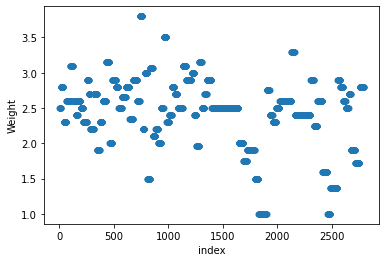

In [25]:
# look for outliers in Output(y)
hallet_df.reset_index().plot(kind='scatter', x= 'index', y ='Weight', s=25)
# there appear to be outliers and it will be better best to sort from highest_allowed and lowest_allowed values above

In [26]:
# find outliers in weight column using max and min allowable values calculated in function above
# more or less anything outside of the average of the column plus or minus 3 * Std of column
# i.e. anything above or below input_max or input_min need to go 

weight_max = 3.978146947702433
weight_min = 0.8664111918324431

In [27]:
# filter out outlier data points
height_column_outliers = hallet_df[(hallet_df['Weight'] > weight_max) | (hallet_df['Weight'] < weight_min)]
height_column_outliers

# it appears all values lie within our boundaries and there are no outliers

,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight


In [28]:
# make master list of outlier columns to be dropped
# one index is in 2 lists <----- Remember
all_lists_len = len(height_column_drop_indices)+len(HR_column_drop_indices)+len(outputy_column_drop_indices)+len(input_column_drop_indices)
all_lists_len

40

In [29]:
new_list = height_column_drop_indices + HR_column_drop_indices + outputy_column_drop_indices + input_column_drop_indices

In [30]:
# concat_list == sum of the each individual list length
# thus our value that appears in both lists is being counted twice, which is what we want, once it is dropped the first time
# nothing will happen when it tried to drop it a second time
len(new_list) == all_lists_len

True

In [31]:
# drop the outlier rows via list of indices (new_list)
hallet_outliers_removed_df = hallet_df.drop(new_list)

In [32]:
hallet_outliers_removed_df

,Time,Baby_ID,AGE,Input (X),Output (y),HR,Height,Weight
0,3:00:00 AM,1,Under-1,36.8,36.8,176,43,2.5
1,4:00:00 AM,1,Under-1,38.6,36.0,162,43,2.5
2,5:00:00 AM,1,Under-1,36.8,36.8,167,43,2.5
3,6:00:00 AM,1,Under-1,36.8,33.4,160,43,2.5
4,7:00:00 AM,1,Under-1,30.6,33.4,160,43,2.5
...,...,...,...,...,...,...,...,...
2790,7:00:00 PM,77,Under-4,35.6,35.8,141,47,2.8
2791,7:30:00 PM,77,Under-4,35.7,35.9,145,47,2.8
2792,8:00:00 PM,77,Under-4,35.8,36.0,148,47,2.8
2793,8:30:00 PM,77,Under-4,35.7,36.1,147,47,2.8


# THIS IS WHERE YOU LEFT OFF --- TRYING TO SCALE DATA
# tried to use scale() but I think thats more for PCA scaling, maybe run 
# MinMaxScaler() on each of he 5 columns then graph relationships between 
# columns using pairplot or similar, 

In [33]:
## We need to scale columns 3:7
scaling_data.data = hallet_outliers_removed_df.iloc[:,3:8]
scaling_data 

NameError: name 'scaling_data' is not defined

In [34]:
# import scale from sklearn.preprocessing

from sklearn.preprocessing import scale

In [35]:
hallet_df_norm = scale(scaling_data.data)
pd.DataFrame(hallet_df_norm).describe()

NameError: name 'scaling_data' is not defined

In [36]:
# encode AGE
hallet_with_dummies_df = pd.get_dummies(hallet_outliers_removed_df, columns = ['AGE'])
hallet_with_dummies_df

,Time,Baby_ID,Input (X),Output (y),HR,Height,Weight,AGE_Under-1,AGE_Under-2,AGE_Under-3,AGE_Under-4
0,3:00:00 AM,1,36.8,36.8,176,43,2.5,1,0,0,0
1,4:00:00 AM,1,38.6,36.0,162,43,2.5,1,0,0,0
2,5:00:00 AM,1,36.8,36.8,167,43,2.5,1,0,0,0
3,6:00:00 AM,1,36.8,33.4,160,43,2.5,1,0,0,0
4,7:00:00 AM,1,30.6,33.4,160,43,2.5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2790,7:00:00 PM,77,35.6,35.8,141,47,2.8,0,0,0,1
2791,7:30:00 PM,77,35.7,35.9,145,47,2.8,0,0,0,1
2792,8:00:00 PM,77,35.8,36.0,148,47,2.8,0,0,0,1
2793,8:30:00 PM,77,35.7,36.1,147,47,2.8,0,0,0,1


In [37]:
git remote add origin https://github.com/wnwagar3/setup_test.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (659733678.py, line 1)